In [1]:
# Libraries and what not

# data libraries
import numpy as np
import pandas as pd

# data viz libraries
import matplotlib.pyplot as plt
import seaborn as sns

#command to tell python to display graphs
%matplotlib inline

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

**Copieed from problem statement**  
Data Dictionary
The data is about customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables:  

* Product - The model no. of the treadmill  
* Age -  Age of the customer in no of years  
* Gender - Gender of the customer  
* Education - Education of the customer in no. of years  
* Marital Status - Marital status of the customer  
* Usage - Avg. # times the customer wants to use the treadmill every week  
* Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)  
* Income - Income of the customer  
* Miles- Miles that a customer expects to run  

## Customer Analysis

**TM195 Customer Info**  
* 75% of Customers are between 18-33
* Customers have 12-18 year of education
* 60% of customers are partnered
* Usage is 2-5 hours a week 50% of users have a fitness level of 3
* Income ranges from roughly 30 - 68, with roughly 50% of customers making between 40 and 50

**TM498 Customer Info**  
* 50% of customers are 24-33
* Customers are close to equal from male to female
* Customers have 12-18 year of education
* 60% of customers are partnered
* Usage is 2-5 hours a week 50% of users have a fitness level of 3
* Income ranges from roughly 45 - 54 for roughly 50% of users

**TM798 Customer Info**  
* 50% of customers are 25-30
* Over 80% of customers are Male
* Customers have 14-21 years of education, making this the most educated group
* 57% of customers are partnered
* Usage is 3-5 hours a week 50% of users have a fitness level of 5 making this the most fit group
* Income ranges from roughly 58 - 91 for roughly 50% of users making this the highest income group


## Product Suggestions

* The TM195 makes up rought 45% of sales but is the lowest profit unit
* The TM498 makes up a 3rd of sales and is middle of the road profict
* The TM798 makes up only about 22% of sales but is the cash cow
* TM798 Customers are the most educated, have the highest incomes, education, fitness level and are primarily male
* At least 50% of customers are between early 20s and early 30s
* The company must do a better job of marketing the premium product both genders
* The premium product as a documented and marked higher level of fitness from its users on average, might make a good marketing campaign highlighting how good it is and targeted at women
* The company also use targeted marketing for the TM798 at more educated and higher income people

In [62]:
df.shape

(180, 9)

In [2]:
data = pd.read_csv('CardioGoodFitness.csv')

In [3]:
df=data.copy()

In [4]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [5]:
df.shape

(180, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [7]:
#df3 = df.columns.to_series
df_obj = df.select_dtypes(include=['object']).columns
print(df_obj)
df_num = df.select_dtypes(include=['int64']).columns
print(df_num)

Index(['Product', 'Gender', 'MaritalStatus'], dtype='object')
Index(['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles'], dtype='object')


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.000,28.789,6.943,18.000,24.000,26.000,33.000,50.000
Education,180.000,15.572,1.617,12.000,14.000,16.000,16.000,21.000
Usage,180.000,3.456,1.085,2.000,3.000,3.000,4.000,7.000
Fitness,180.000,3.311,0.959,1.000,3.000,3.000,4.000,5.000
Income,180.000,53719.578,16506.684,29562.000,44058.750,50596.500,58668.000,104581.000
Miles,180.000,103.194,51.864,21.000,66.000,94.000,114.750,360.000


In [9]:
df.describe(include=['object']).T

,count,unique,top,freq
Product,180,3,TM195,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


In [10]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df['Product'].append(df['Gender']).append(df['MaritalStatus']).unique()

array(['TM195', 'TM498', 'TM798', 'Male', 'Female', 'Single', 'Partnered'],
      dtype=object)

In [13]:
print('There are ', df['Product'].nunique(), ' different products available: ', df['Product'].unique(), sep='')
print('There are ', df['Gender'].nunique(), ' unique genders: ', df['Gender'].unique(), sep='')
print('There are ', df['MaritalStatus'].nunique(), ' martital statuses: ', df['MaritalStatus'].unique(), sep='')

There are 3 different products available: ['TM195' 'TM498' 'TM798']
There are 2 unique genders: ['Male' 'Female']
There are 2 martital statuses: ['Single' 'Partnered']


## Univariate Analysis

In [14]:
df.sample(1)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
44,TM195,28,Female,14,Partnered,2,3,46617,56


In [15]:
#quick and easy function to quickly print out histograms, countplots and boxplots

def plots(dataframe, cat):
    plt.figure(figsize=(12,8))
    sns.histplot(data=dataframe, x=cat)
    plt.show()
    plt.figure(figsize=(12,8))
    sns.countplot(data=df, x=cat, palette='bright')
    plt.show()
    plt.figure(figsize=(12,8))
    sns.boxplot(data=dataframe, x=cat, color='violet')
    plt.show()

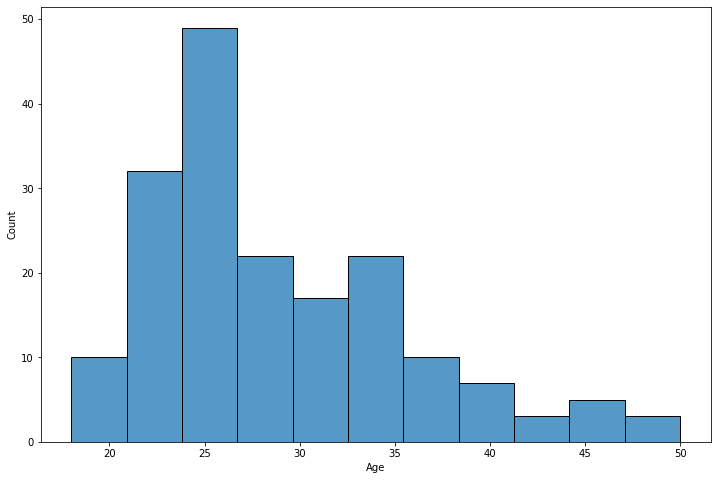

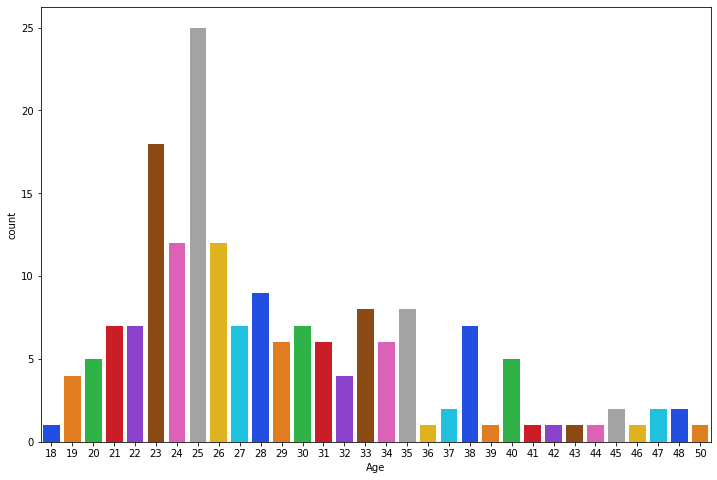

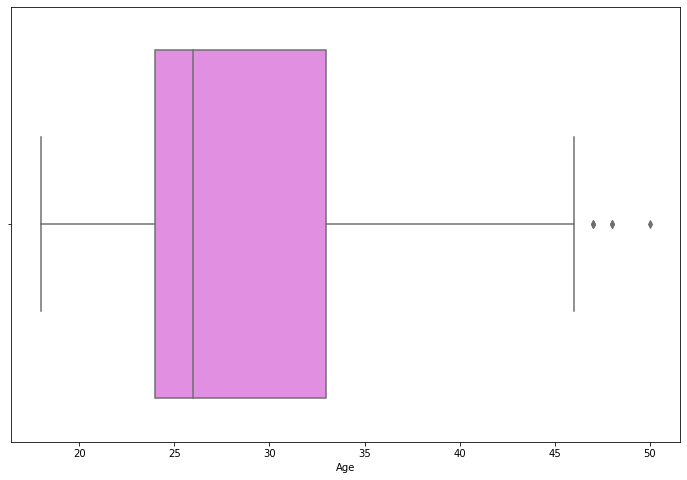

In [16]:
#testing the function

plots(df, 'Age')

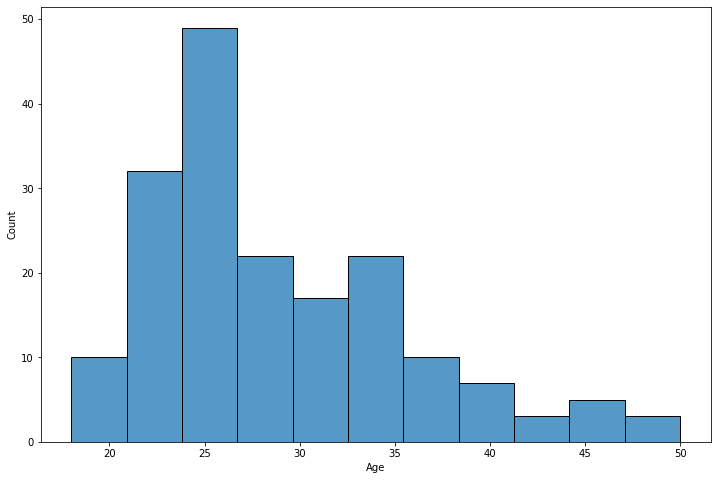

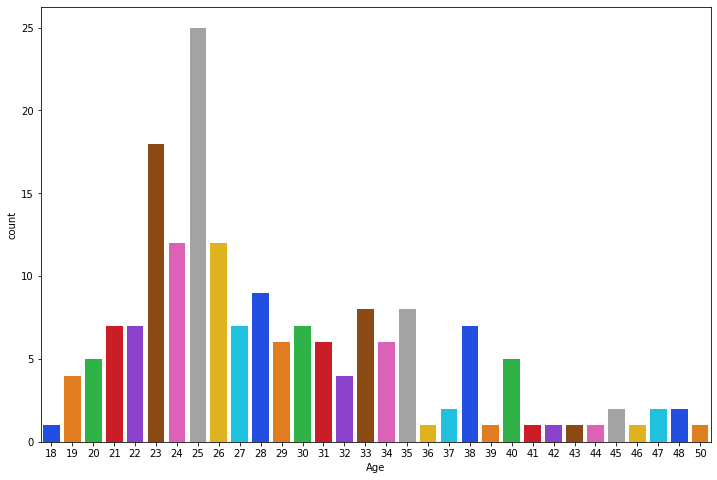

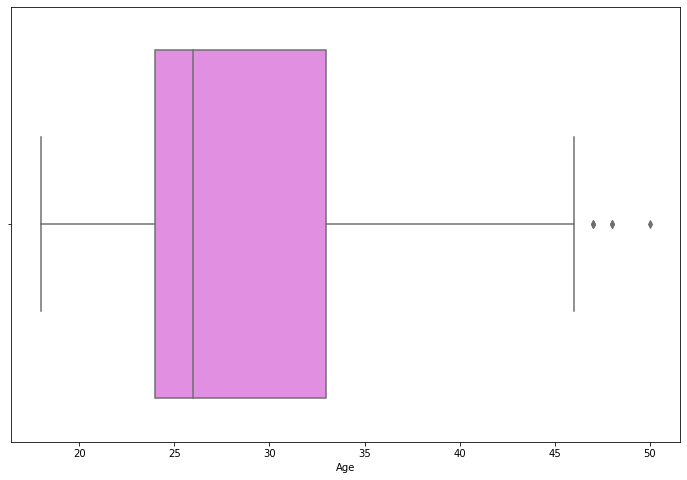

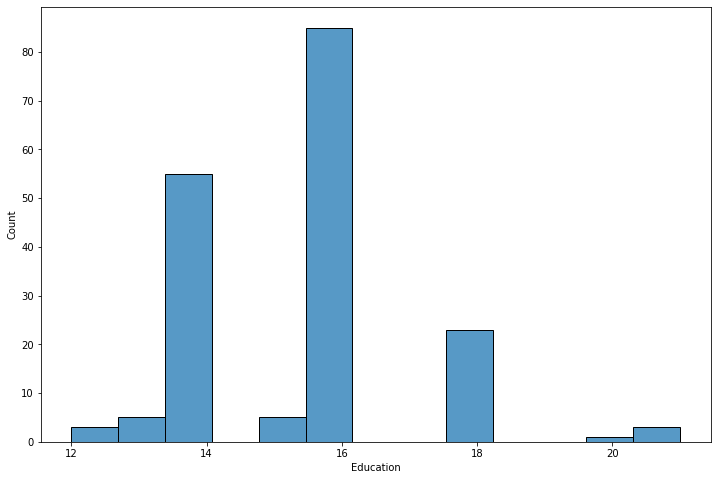

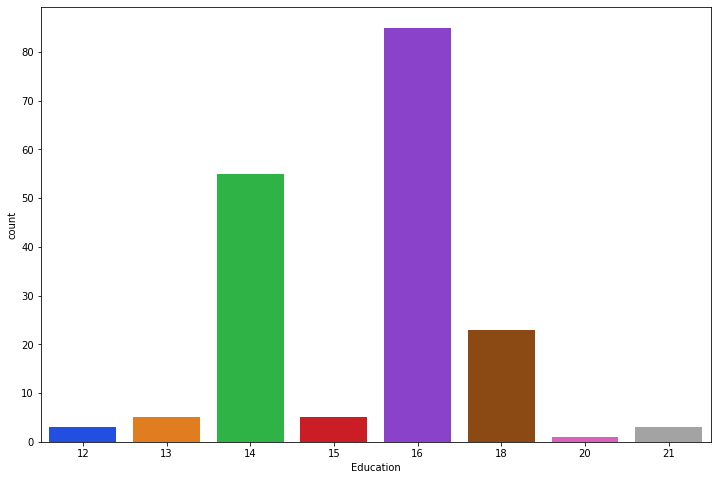

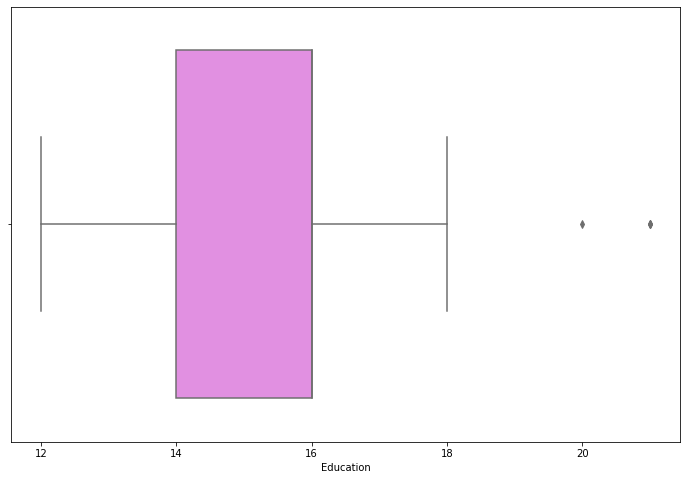

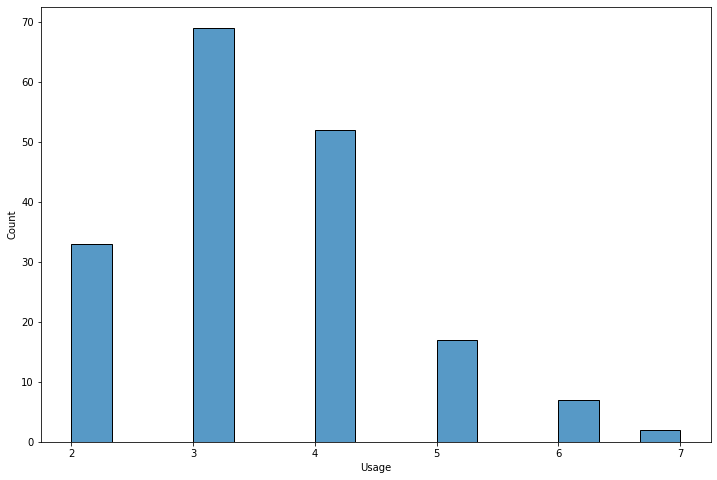

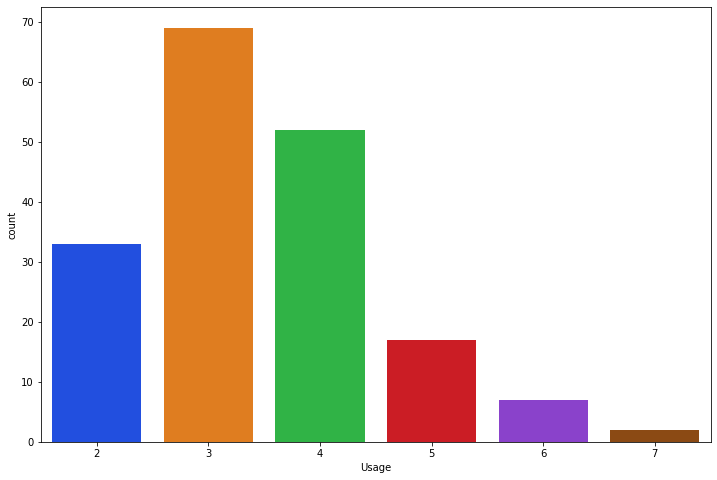

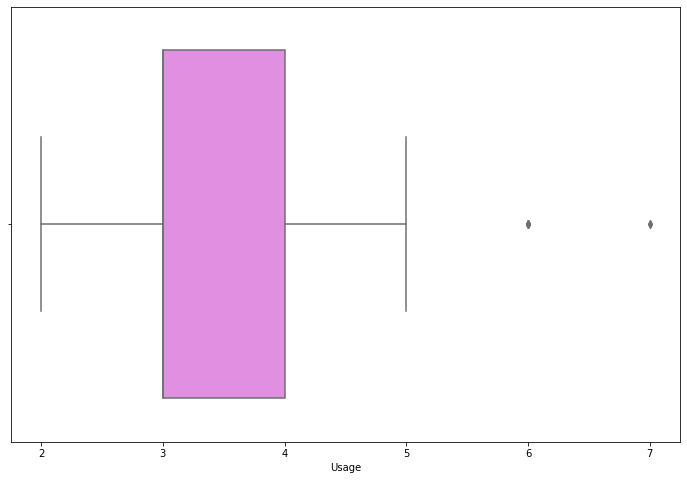

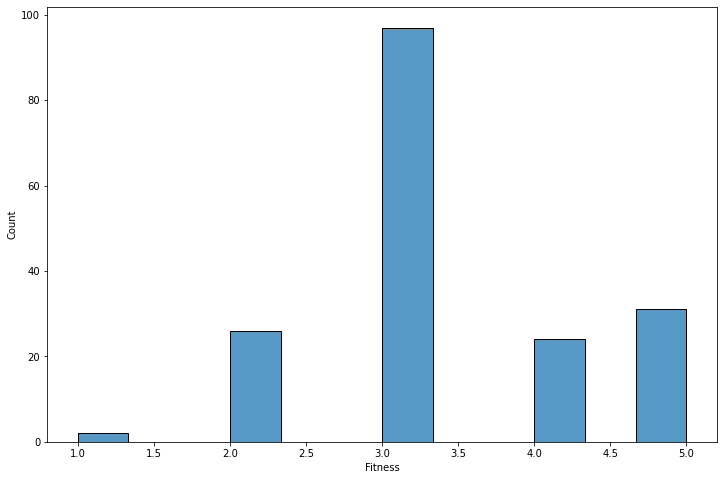

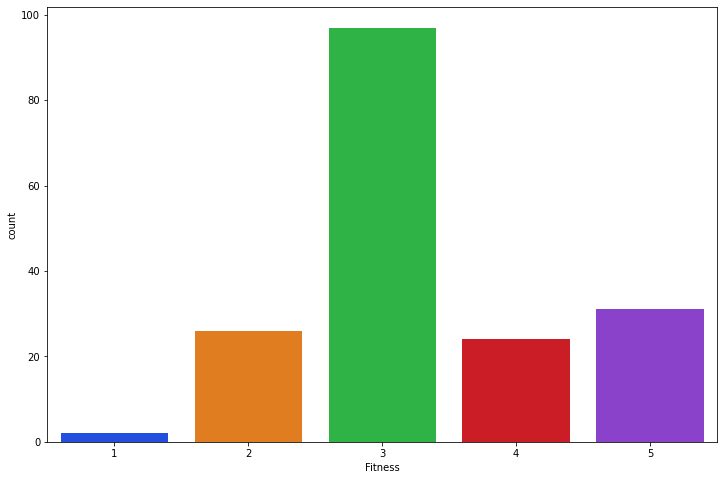

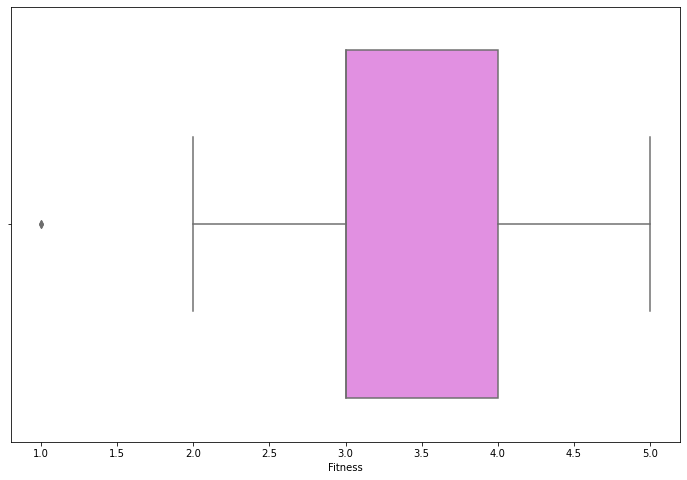

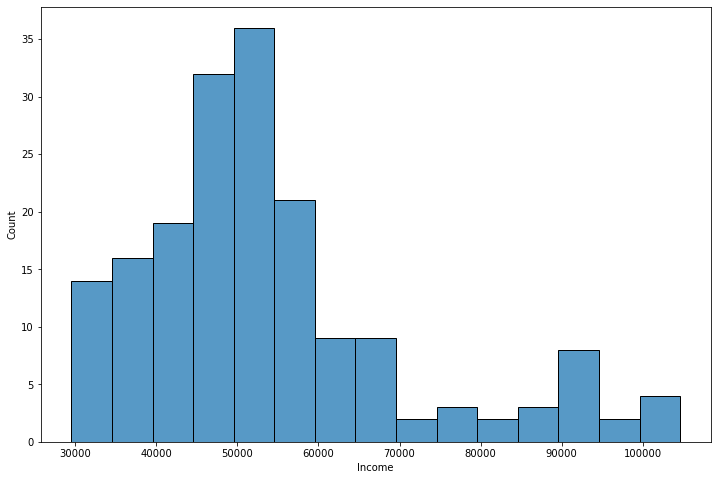

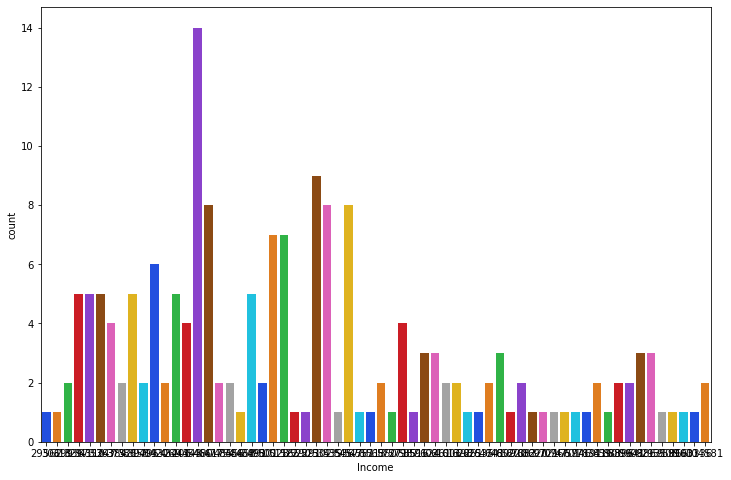

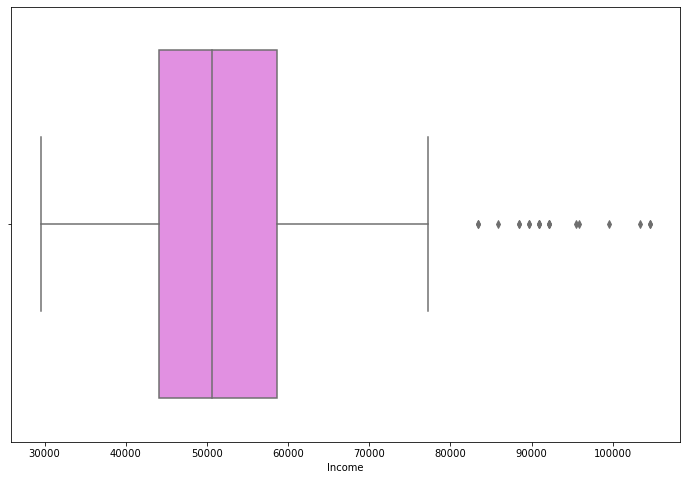

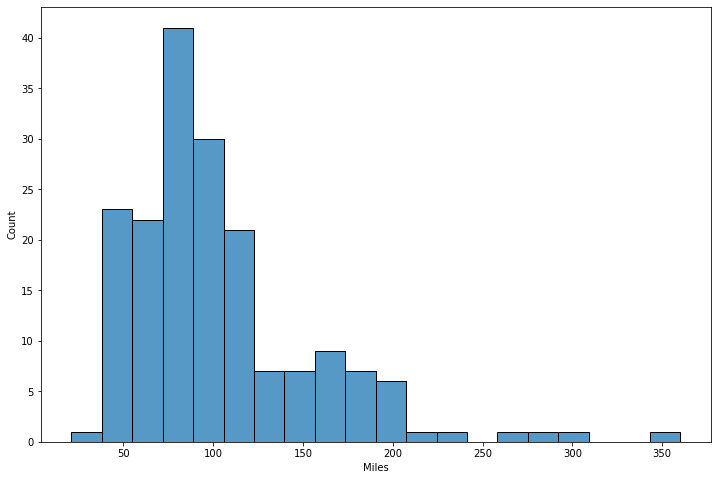

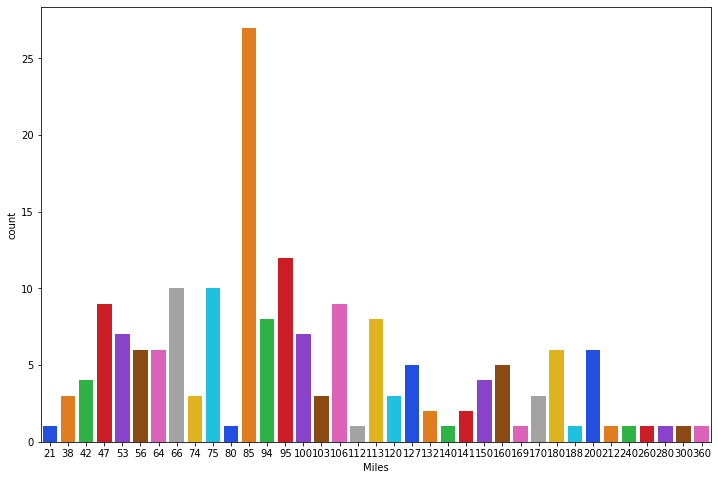

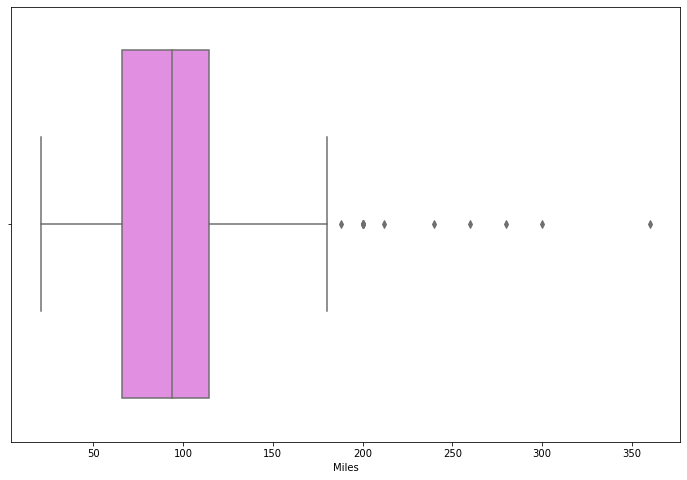

In [17]:
# For loop to call the plots function passing it all int64 type columns of the data frame.
# the plots function then prints out a histogram, countplot and barplot every column

for column in df_num:
    plots(df, column)

age = pretty normally distrabuted with a few outliers on the high end  
education = ""  
usage = ""  
fitness = not normally distrabuted and a single outlier on the low end  
income = numerous outliers on the high end  
miles = pretty normal on distribution several outliers on the high end  

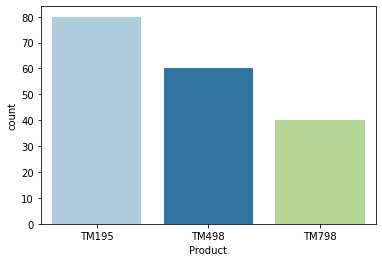

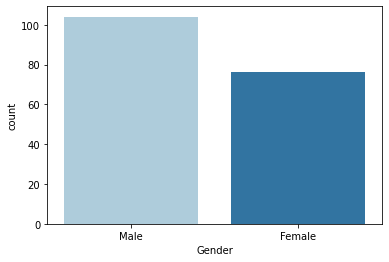

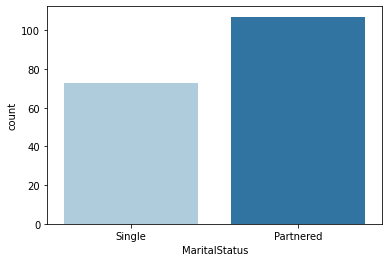

In [18]:
# For loop to print out a countplot for all objects of the dataframe

for column in df_obj:
    sns.countplot(data=df, x=column, palette='Paired')
    plt.show()

The most popular product, the TM195 has almost twice the sales of the least popular product the TM798  
The majority of customers are male but only roughly 55%  
The majority of customers are partnererd but only roughly 60%  

## Bivariate Analysis

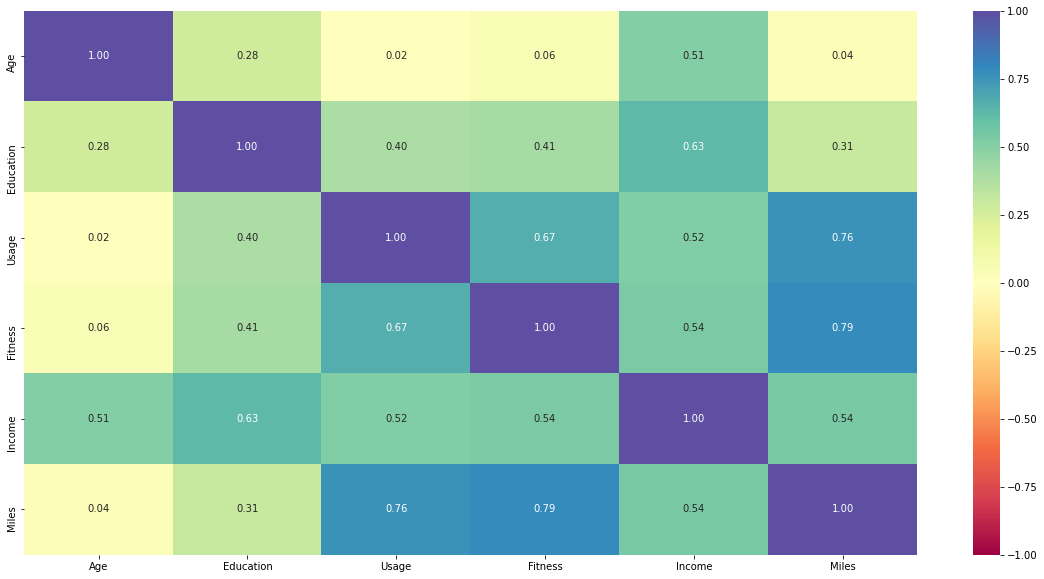

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

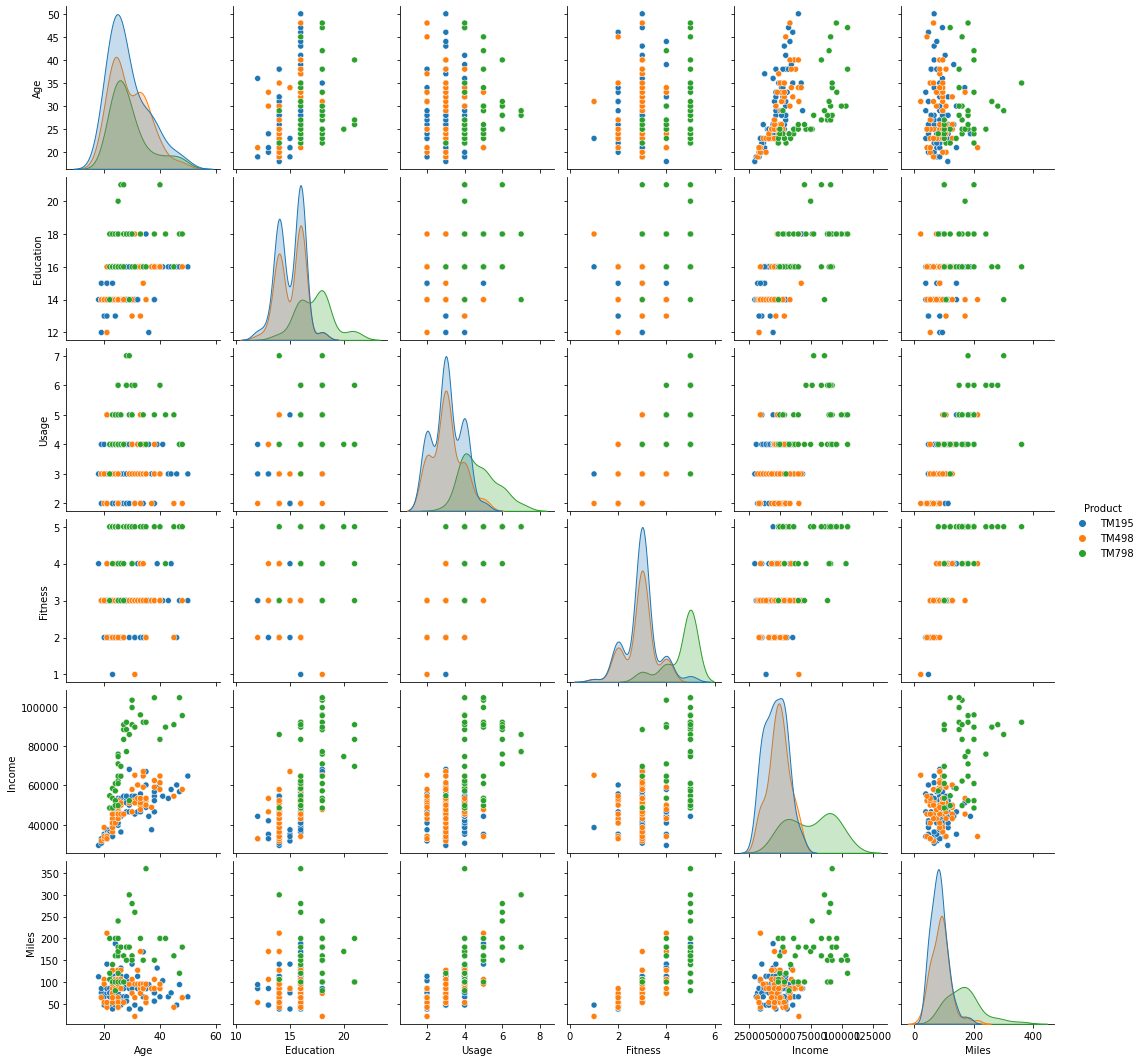

In [20]:
sns.pairplot(data=df, hue='Product', diag_kind='kde')
plt.show()

In [21]:
def bplots(dataframe, cat, cat2):
    plt.figure(figsize=(15,7))
    sns.jointplot(data=dataframe, x=cat, y=cat2)
    plt.show()
    plt.figure(figsize=(15,7))
    sns.boxplot(data=dataframe, x=cat, y=cat2, color='violet')
    plt.show()

<Figure size 1080x504 with 0 Axes>

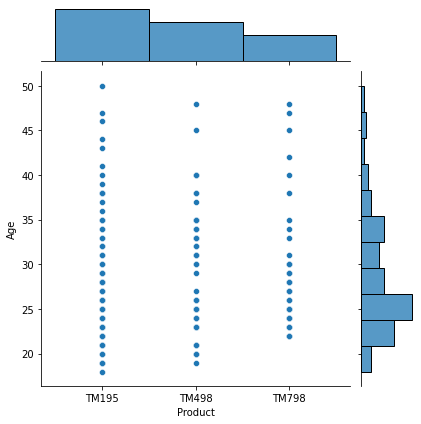

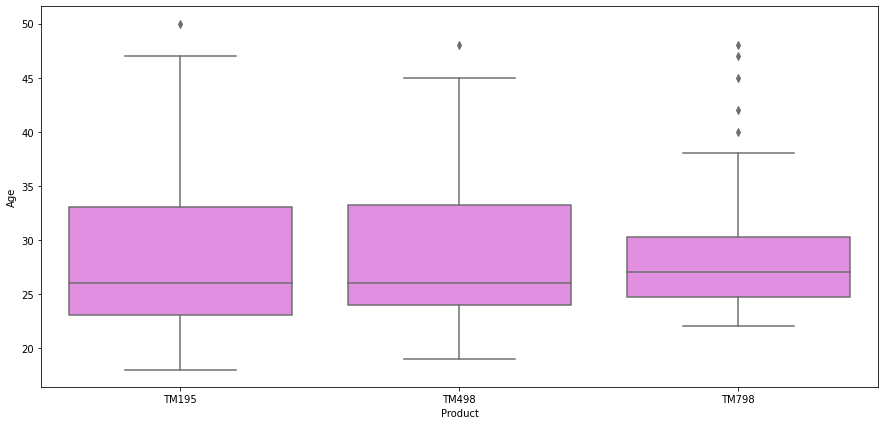

In [22]:
bplots(df, "Product", "Age")

<Figure size 1080x504 with 0 Axes>

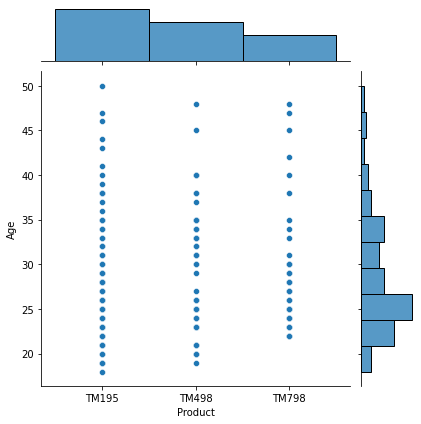

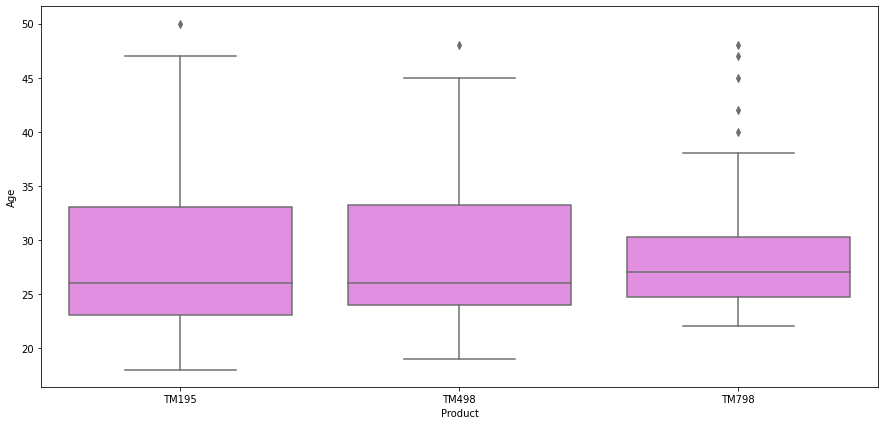

<Figure size 1080x504 with 0 Axes>

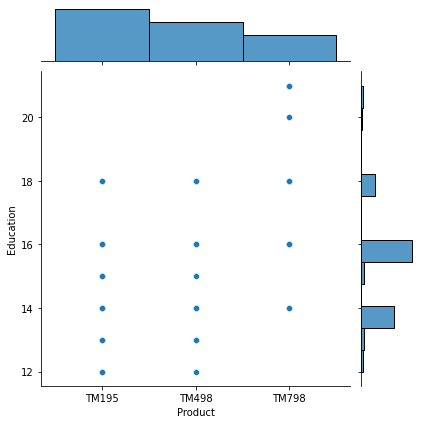

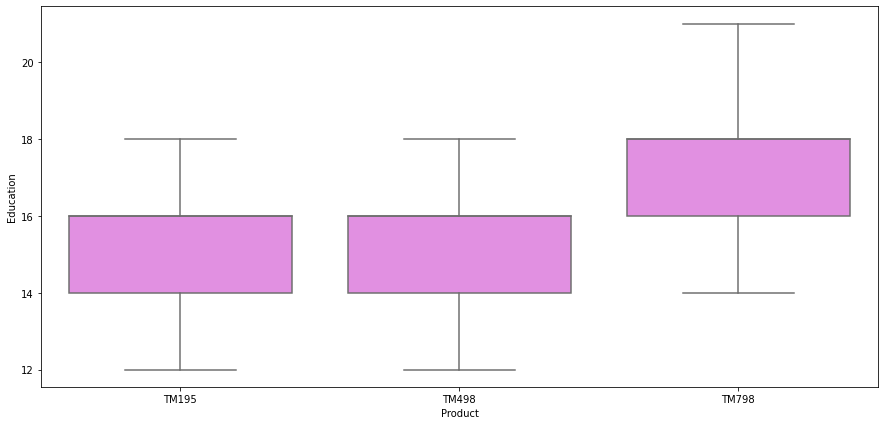

<Figure size 1080x504 with 0 Axes>

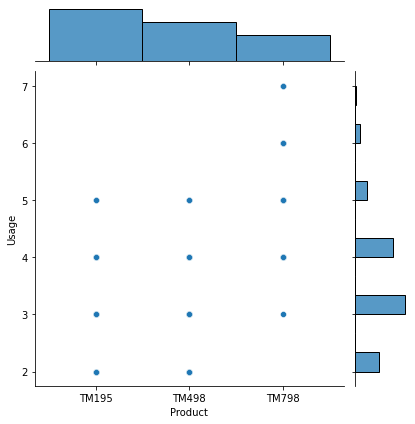

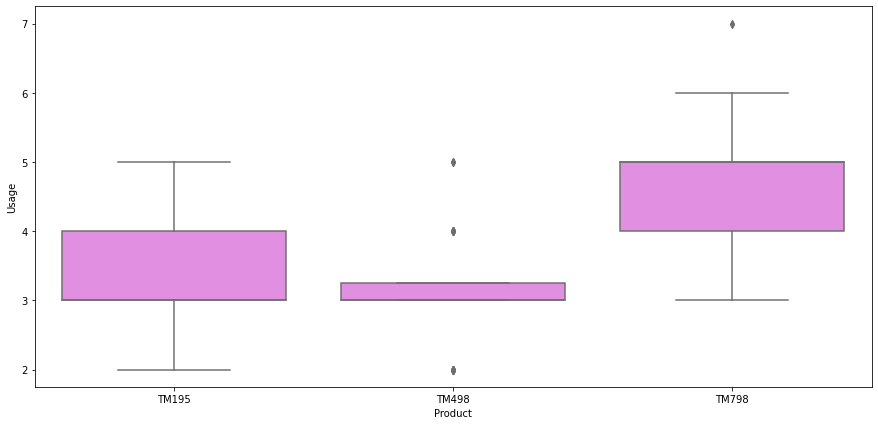

<Figure size 1080x504 with 0 Axes>

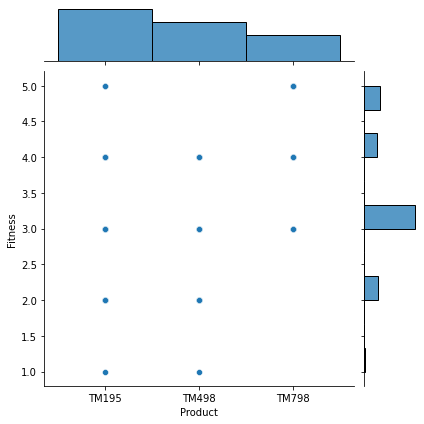

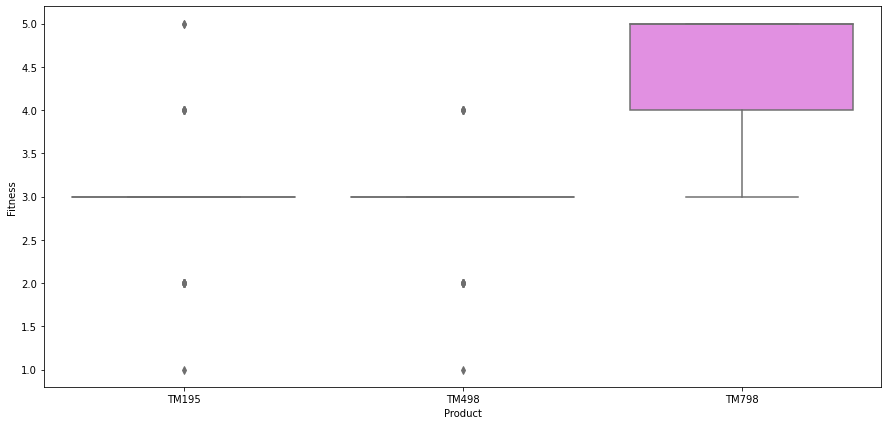

<Figure size 1080x504 with 0 Axes>

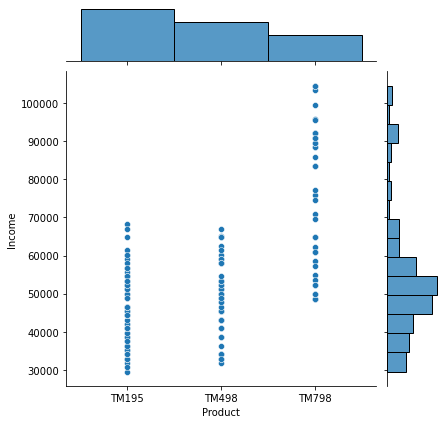

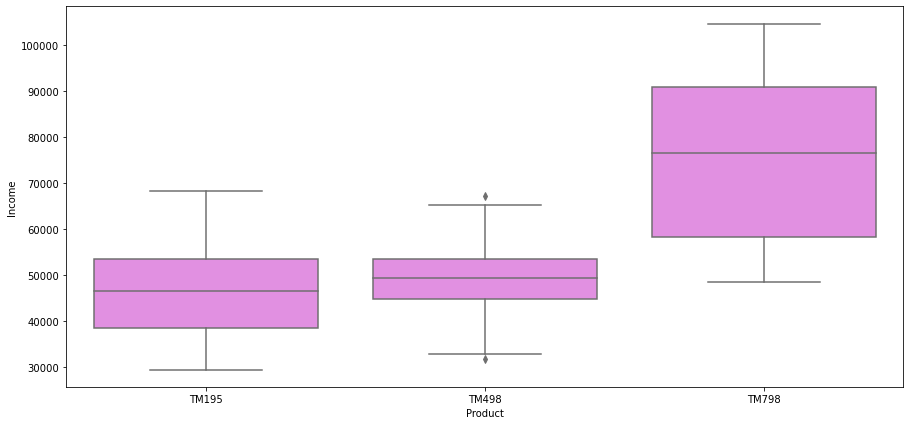

<Figure size 1080x504 with 0 Axes>

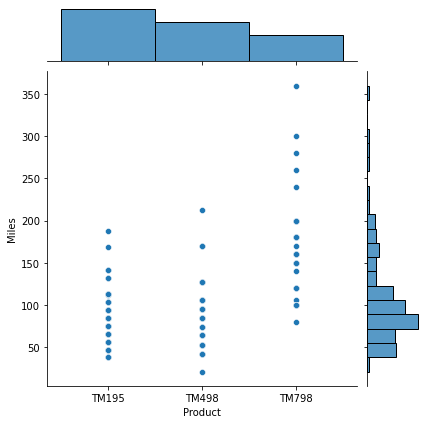

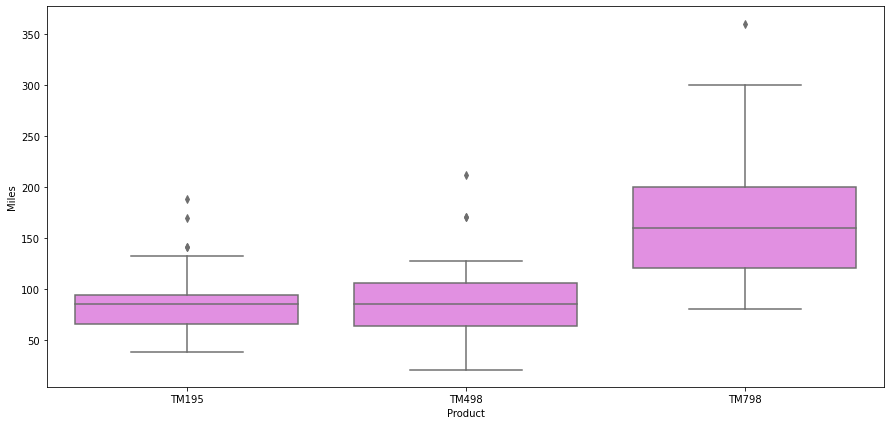

<Figure size 1080x504 with 0 Axes>

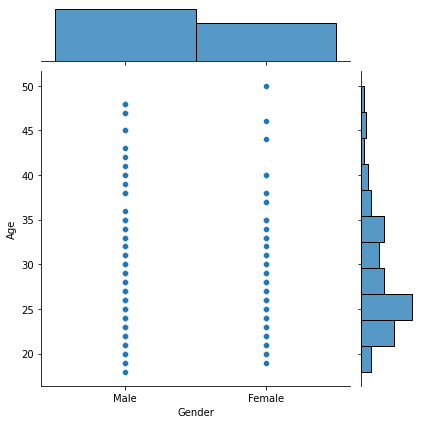

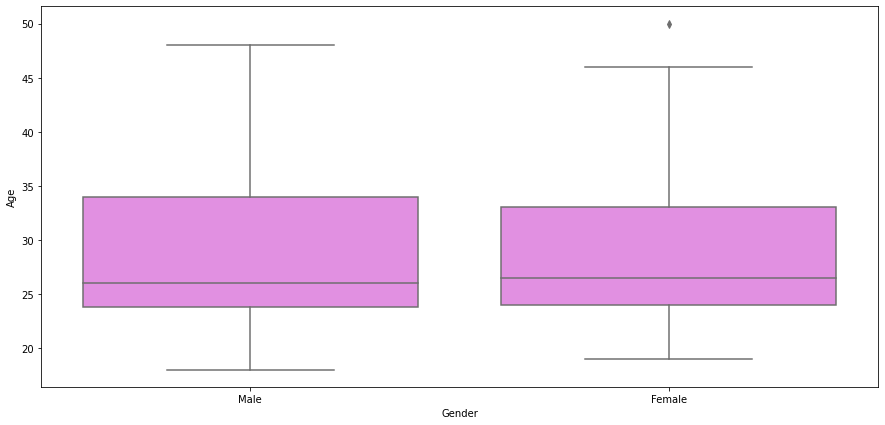

<Figure size 1080x504 with 0 Axes>

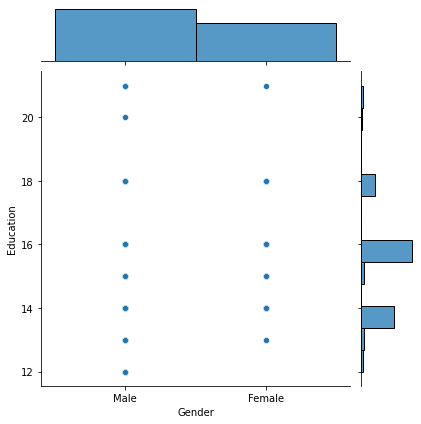

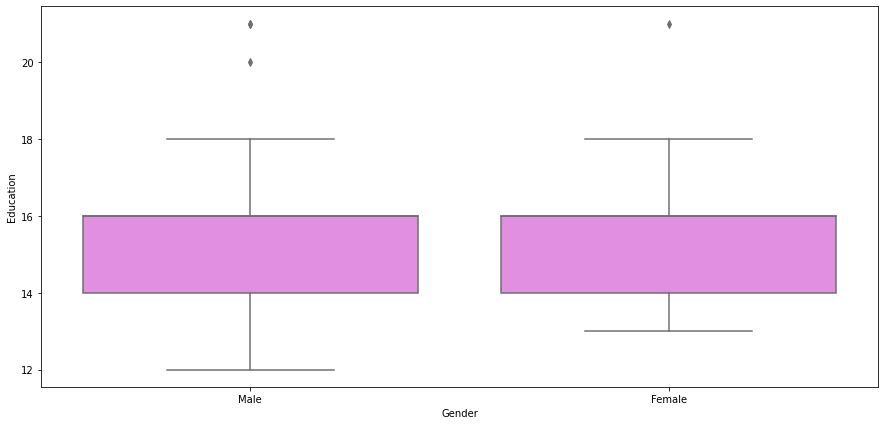

<Figure size 1080x504 with 0 Axes>

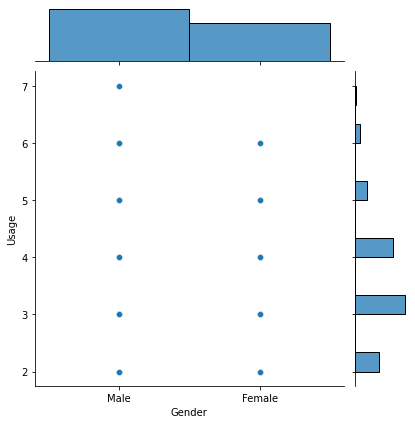

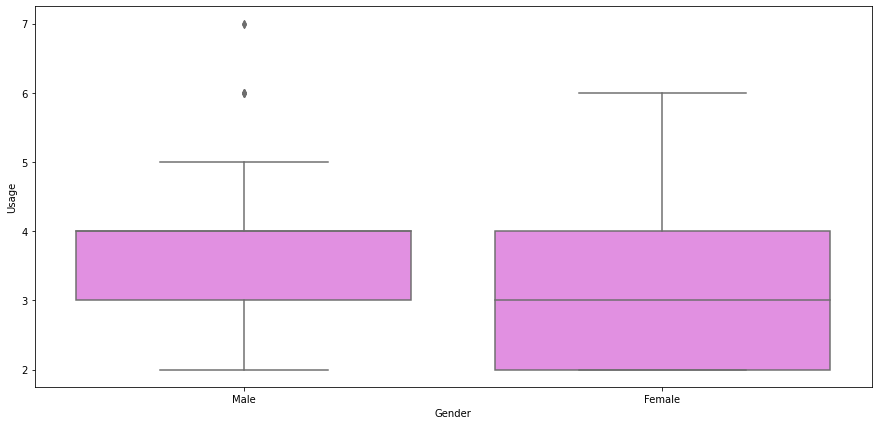

<Figure size 1080x504 with 0 Axes>

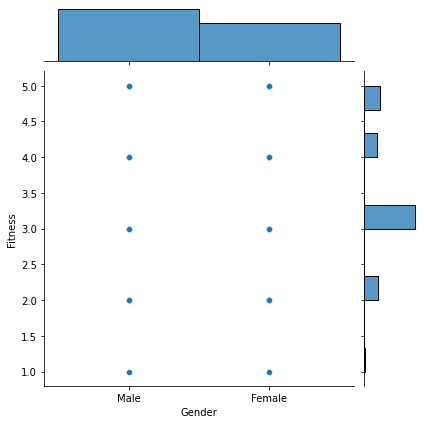

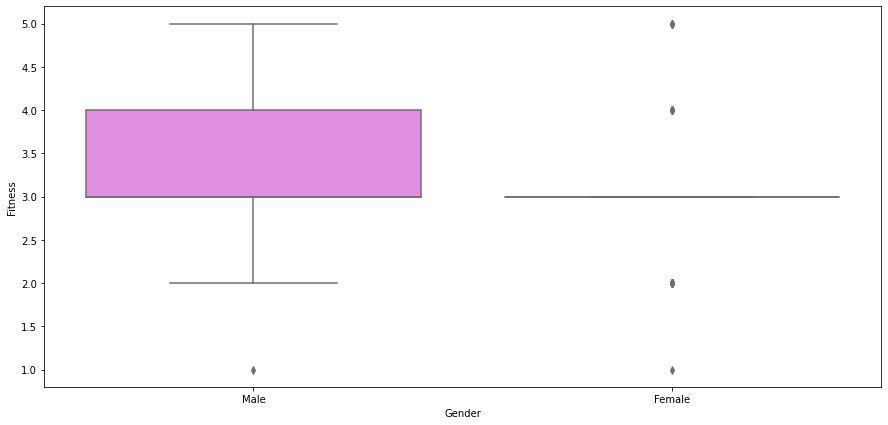

<Figure size 1080x504 with 0 Axes>

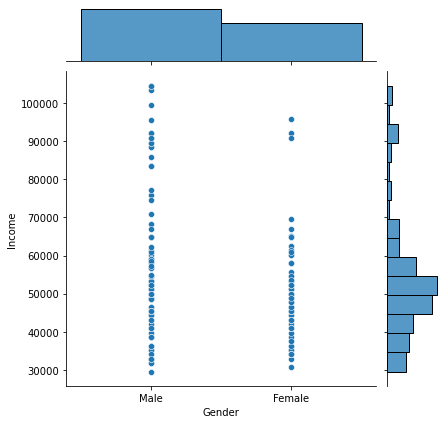

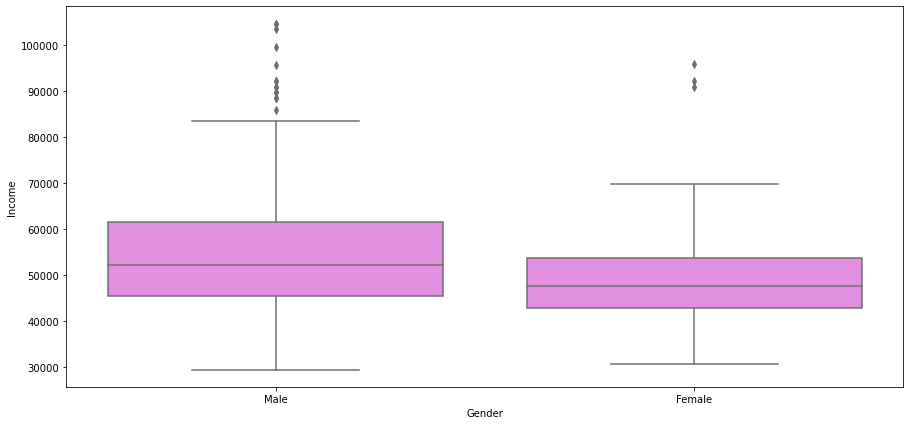

<Figure size 1080x504 with 0 Axes>

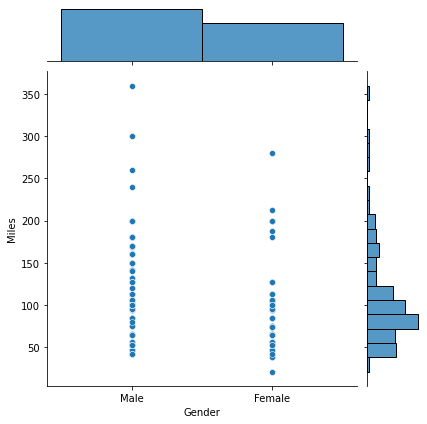

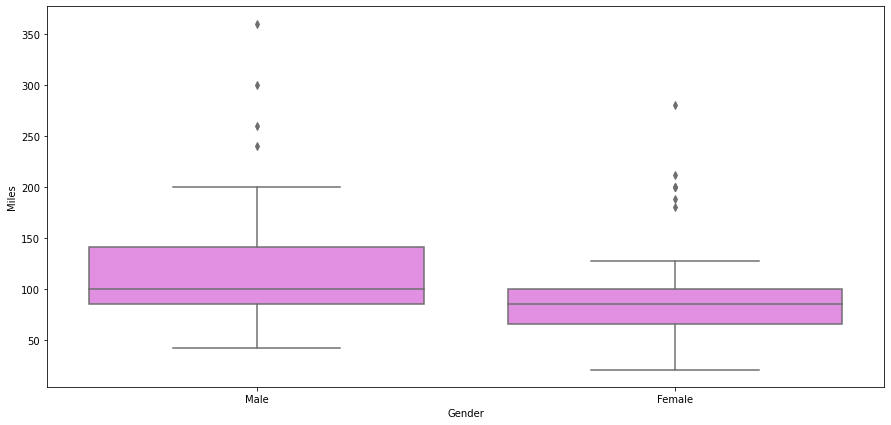

<Figure size 1080x504 with 0 Axes>

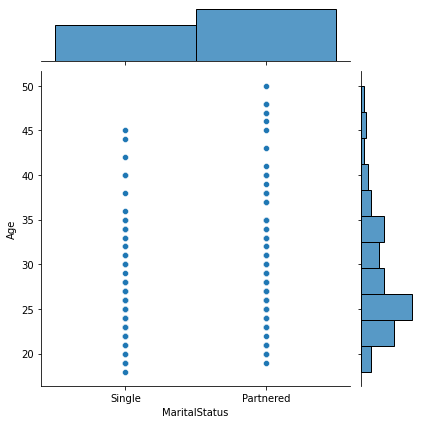

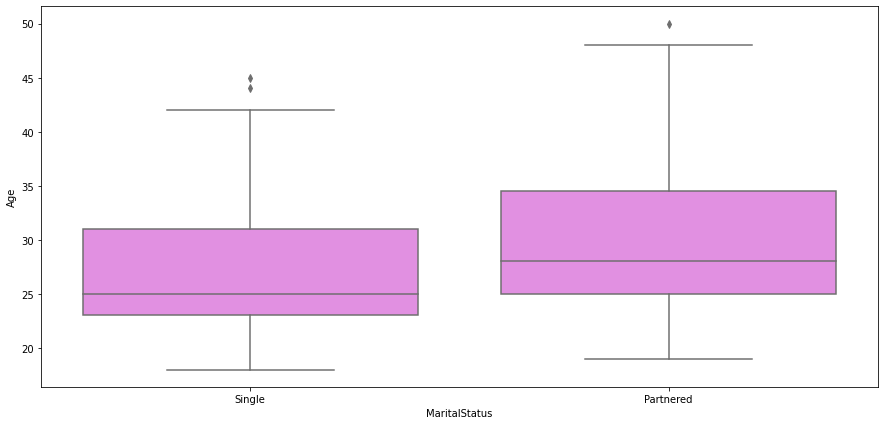

<Figure size 1080x504 with 0 Axes>

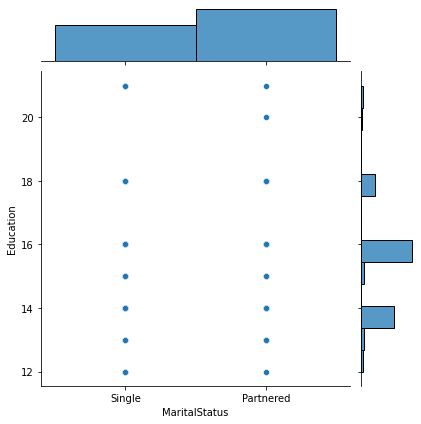

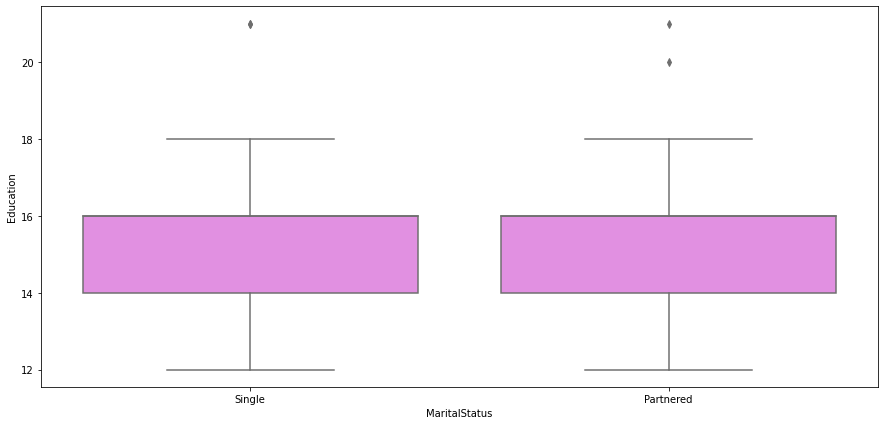

<Figure size 1080x504 with 0 Axes>

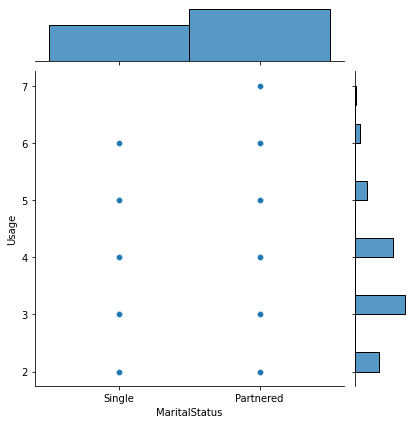

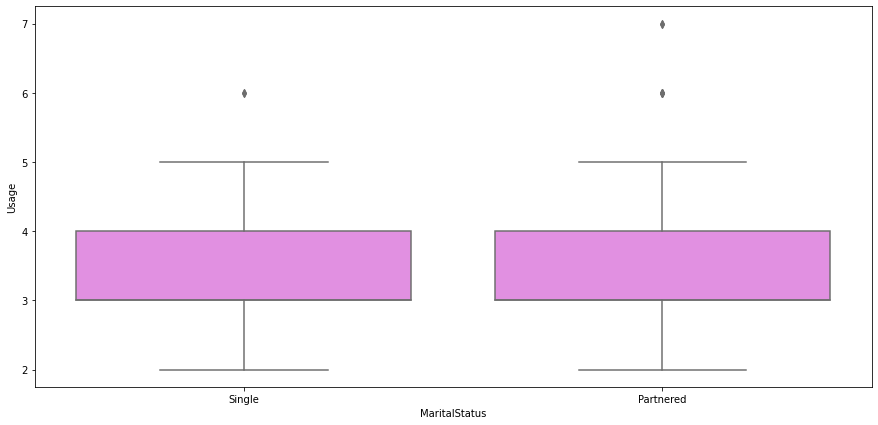

<Figure size 1080x504 with 0 Axes>

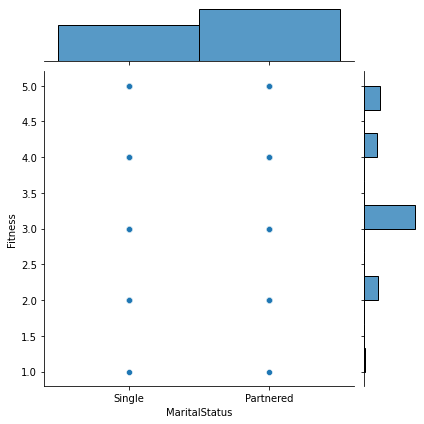

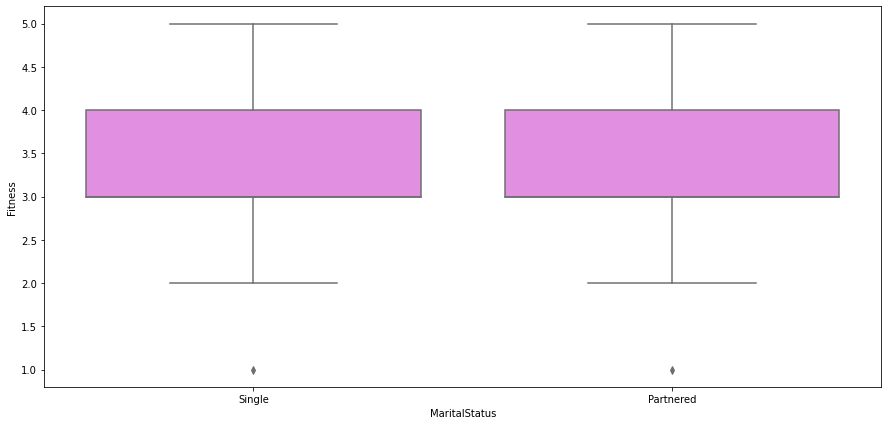

<Figure size 1080x504 with 0 Axes>

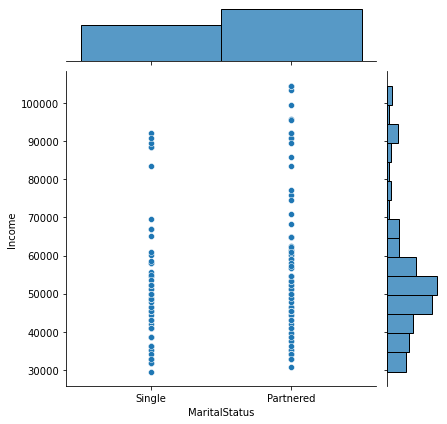

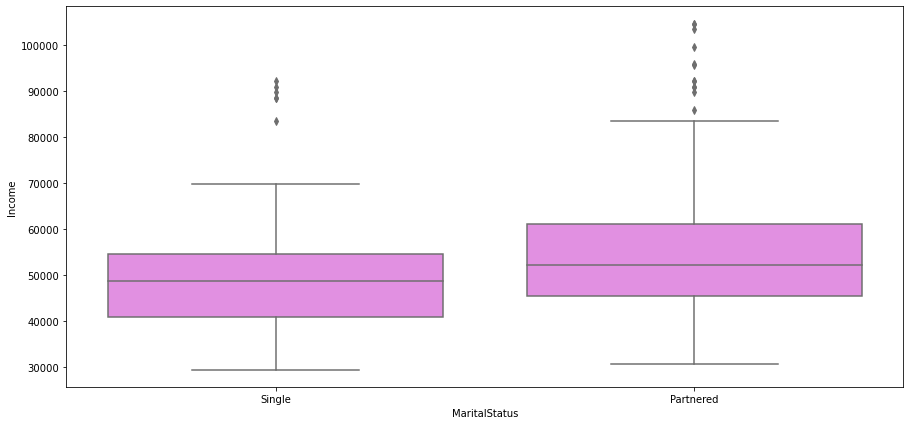

<Figure size 1080x504 with 0 Axes>

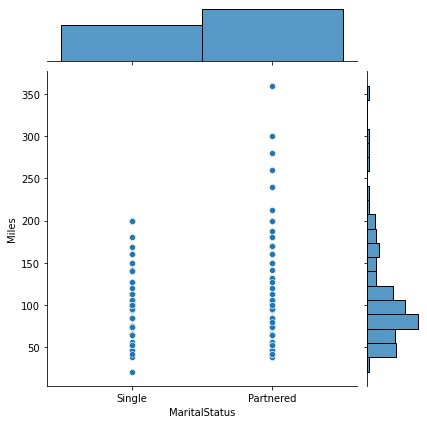

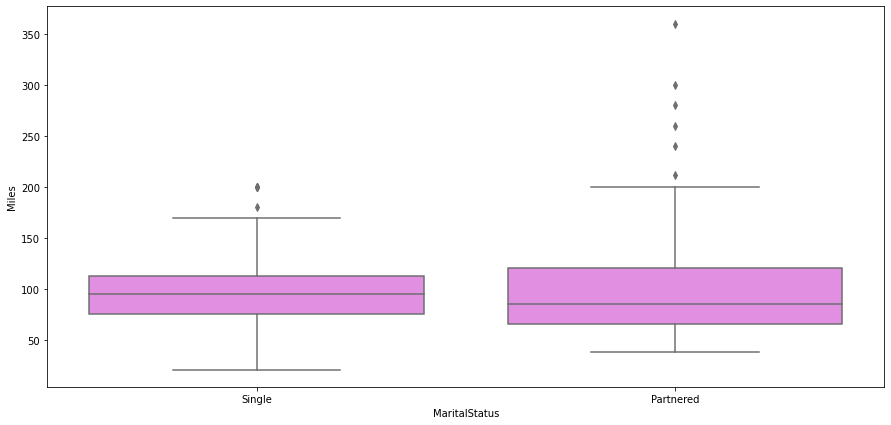

In [23]:
# For loop to print out a joint and box plot for all objects of the dataframe as the x variable and all ints as the y variable

for column in df_obj:
    for column2 in df_num:
        bplots(df, column, column2)

## Customer Profiles

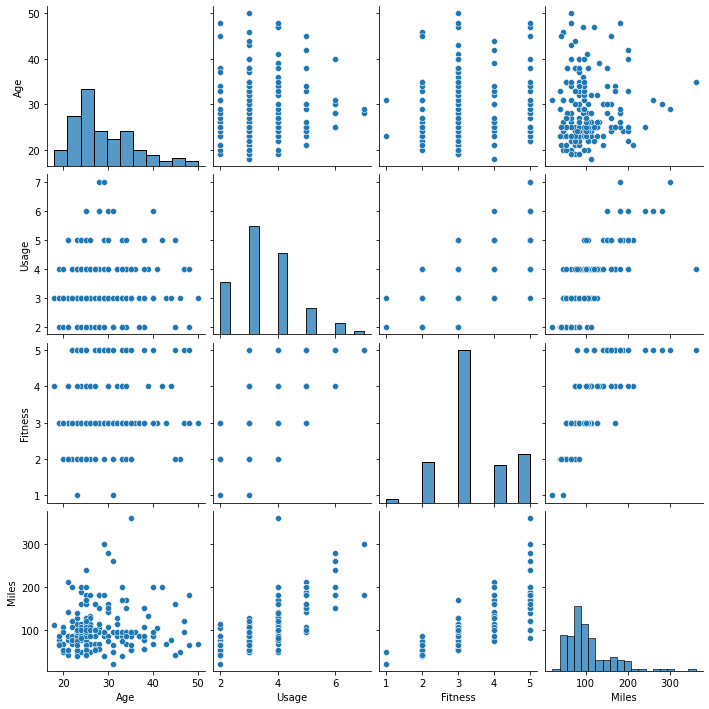

In [27]:
sns.pairplot(df[['Age', 'Usage', 'Fitness', 'Miles']]);

## Customer Profiles

TM195

In [56]:
df[df['Product']=='TM195'].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,80,1,TM195,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,80.000,NaN,NaN,NaN,28.550,7.221,18.000,23.000,26.000,33.000,50.000
Gender,80,2,Male,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,80.000,NaN,NaN,NaN,15.037,1.216,12.000,14.000,16.000,16.000,18.000
MaritalStatus,80,2,Partnered,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,80.000,NaN,NaN,NaN,3.087,0.783,2.000,3.000,3.000,4.000,5.000
Fitness,80.000,NaN,NaN,NaN,2.962,0.665,1.000,3.000,3.000,3.000,5.000
Income,80.000,NaN,NaN,NaN,46418.025,9075.783,29562.000,38658.000,46617.000,53439.000,68220.000
Miles,80.000,NaN,NaN,NaN,82.787,28.874,38.000,66.000,85.000,94.000,188.000


**TM195 Customer Info**
Includes Informaiton from the graphs below

* 75% of Customers are between 18-33
* Customers have 12-18 year of education
* 60% of customers are partnered
* Usage is 2-5 hours a week 50% of users have a fitness level of 3
* Income ranges from roughly 30 - 68, with roughly 50% of customers making between 40 and 50

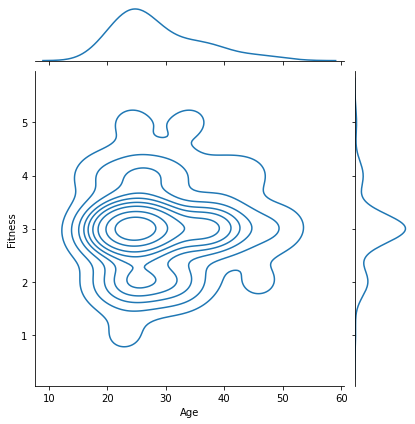

In [61]:
sns.jointplot(data=df[df['Product']=='TM195'], x = 'Age', y = 'Fitness', kind = 'kde')   #show the density of usage vs fitness for TM 195 products

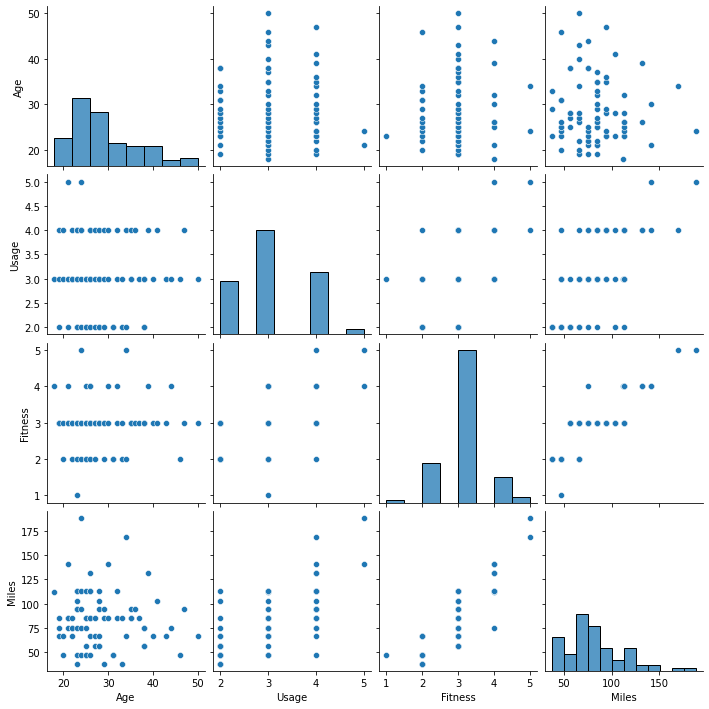

In [43]:
sns.pairplot(df[df['Product']=='TM195'][['Age', 'Usage', 'Fitness', 'Miles']]); #Compare Demographic information for customers of this product

**TM195 Questions**

- Age and Miles
- Fiteness and Age
- Fitness and Usage
- Fitness and Miles
- Age and Usage
- Gender and Age


## - TM498

In [59]:
df[df['Product']=='TM498'].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,60,1,TM498,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,60.000,NaN,NaN,NaN,28.900,6.645,19.000,24.000,26.000,33.250,48.000
Gender,60,2,Male,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,60.000,NaN,NaN,NaN,15.117,1.223,12.000,14.000,16.000,16.000,18.000
MaritalStatus,60,2,Partnered,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,60.000,NaN,NaN,NaN,3.067,0.800,2.000,3.000,3.000,3.250,5.000
Fitness,60.000,NaN,NaN,NaN,2.900,0.630,1.000,3.000,3.000,3.000,4.000
Income,60.000,NaN,NaN,NaN,48973.650,8653.989,31836.000,44911.500,49459.500,53439.000,67083.000
Miles,60.000,NaN,NaN,NaN,87.933,33.263,21.000,64.000,85.000,106.000,212.000


**TM498 Customer Info**
Includes Informaiton from the graphs below and in the next section

* 50% of customers are 24-33
* Customers are close to equal from male to female
* Customers have 12-18 year of education
* 60% of customers are partnered
* Usage is 2-5 hours a week 50% of users have a fitness level of 3
* Income ranges from roughly 45 - 54 for roughly 50% of users

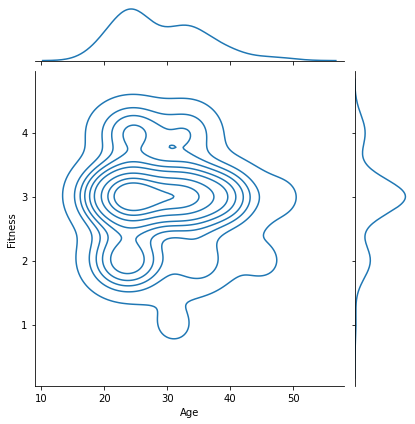

In [29]:
sns.jointplot(data=df[df['Product']=='TM498'], x = 'Age', y = 'Fitness', kind = 'kde')   #show the density of usage vs fitness for TM 498 products

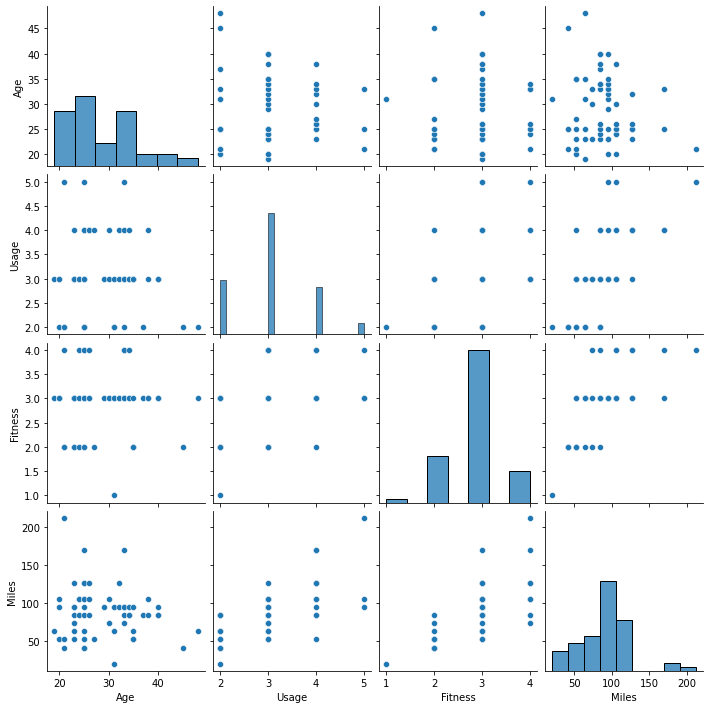

In [47]:
sns.pairplot(df[df['Product']=='TM498'][['Age', 'Usage', 'Fitness', 'Miles']]); #Compare Demographic information for customers of this product

**TM498 Questions**

- Age and Miles
- Fiteness and Age
- Fitness and Usage
- Fitness and Miles
- Age and Usage

## - TM798

In [60]:
df[df['Product']=='TM798'].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,40,1,TM798,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,40.000,NaN,NaN,NaN,29.100,6.972,22.000,24.750,27.000,30.250,48.000
Gender,40,2,Male,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,40.000,NaN,NaN,NaN,17.325,1.639,14.000,16.000,18.000,18.000,21.000
MaritalStatus,40,2,Partnered,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,40.000,NaN,NaN,NaN,4.775,0.947,3.000,4.000,5.000,5.000,7.000
Fitness,40.000,NaN,NaN,NaN,4.625,0.667,3.000,4.000,5.000,5.000,5.000
Income,40.000,NaN,NaN,NaN,75441.575,18505.837,48556.000,58204.750,76568.500,90886.000,104581.000
Miles,40.000,NaN,NaN,NaN,166.900,60.067,80.000,120.000,160.000,200.000,360.000


**TM798 Customer Info**
Includes Informaiton from the graphs below and in the next section

* 50% of customers are 25-30
* Over 80% of customers are Male
* Customers have 14-21 years of education, making this the most educated group
* 57% of customers are partnered
* Usage is 3-5 hours a week 50% of users have a fitness level of 5 making this the most fit group
* Income ranges from roughly 58 - 91 for roughly 50% of users making this the highest income group

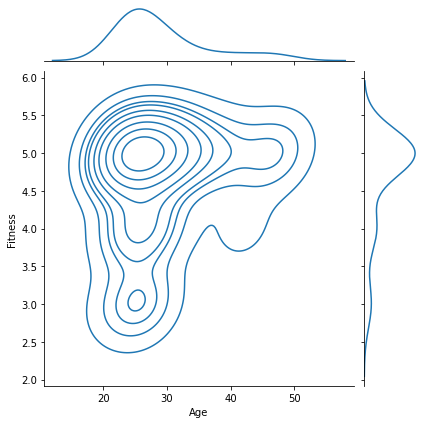

In [30]:
sns.jointplot(data=df[df['Product']=='TM798'], x = 'Age', y = 'Fitness', kind = 'kde')   #show the density of usage vs fitness for TM 798 products

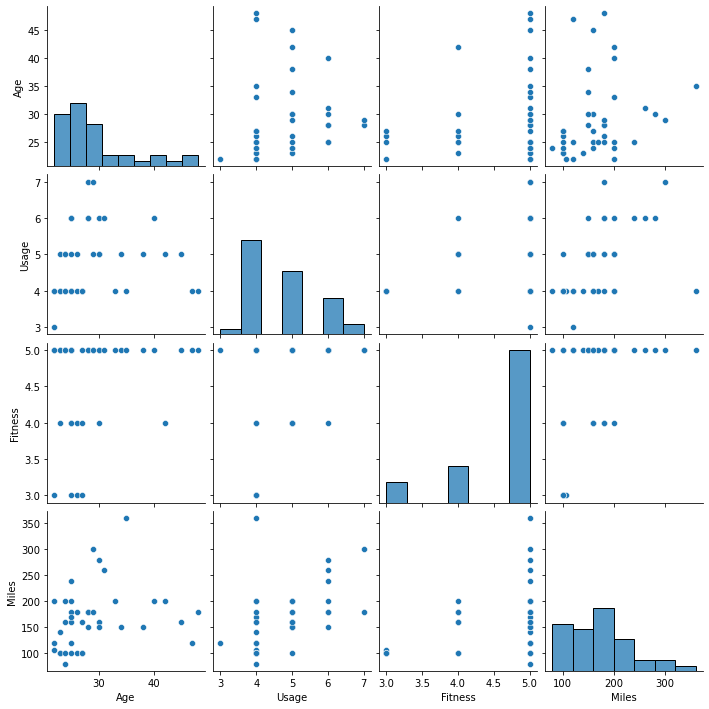

In [48]:
sns.pairplot(df[df['Product']=='TM798'][['Age', 'Usage', 'Fitness', 'Miles']]); #Compare Demographic information for customers of this product

**TM198 Questions**
- Age and Miles
- Fiteness and Age
- Fitness and Usage
- Fitness and Miles
- Age and Usage

**All products were close enough that the questions are the same between them**

## Deep Diving Product Information

In [34]:
def bplotshue(dataframe, cat, cat2, hue):
    plt.figure(figsize=(15,7))
    sns.jointplot(data=dataframe, x=cat, y=cat2, hue=hue, ci=0)
    plt.show()
    plt.figure(figsize=(15,7))
    sns.boxplot(data=dataframe, x=cat, y=cat2, hue=hue, color='violet')
    plt.show()

<Figure size 1080x504 with 0 Axes>

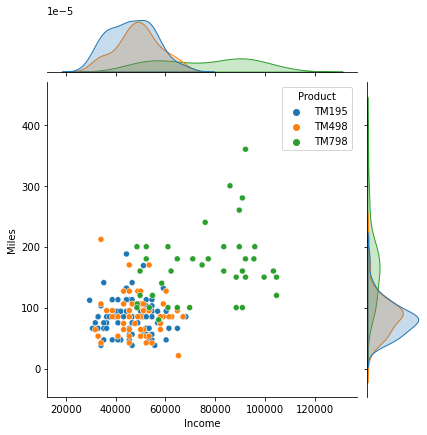

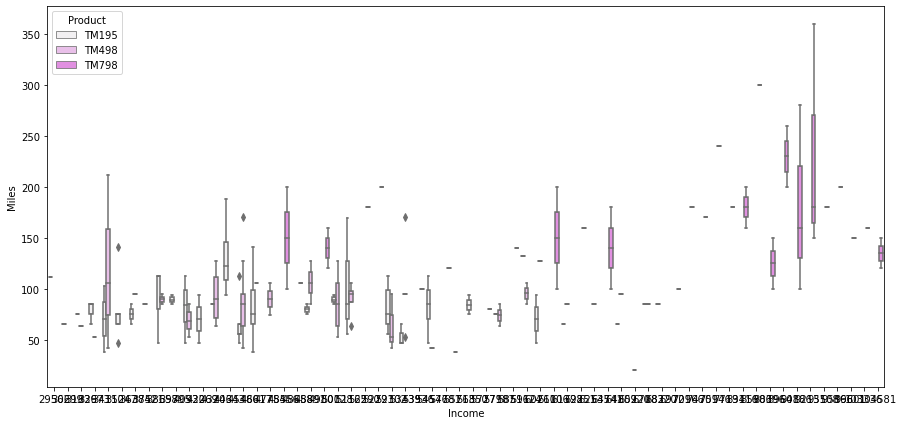

In [35]:
bplotshue(df, 'Income', 'Miles', 'Product')

In [37]:
#printing every iteration of all object catagories as a hue. For each hue there is a comparision chart of all int categories against all other int categories.
#for column in df_obj:
#    for column2 in df_num:
#        for column3 in df_num:
#            bplotshue(df, column2, column3, column)

<Figure size 1080x504 with 0 Axes>

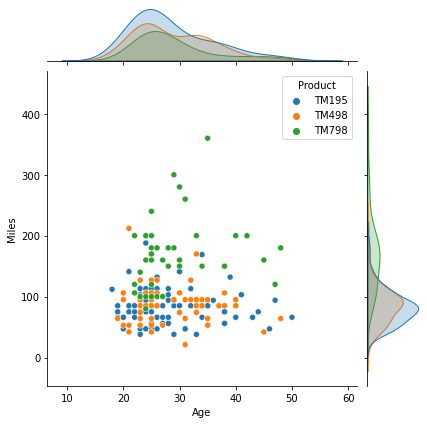

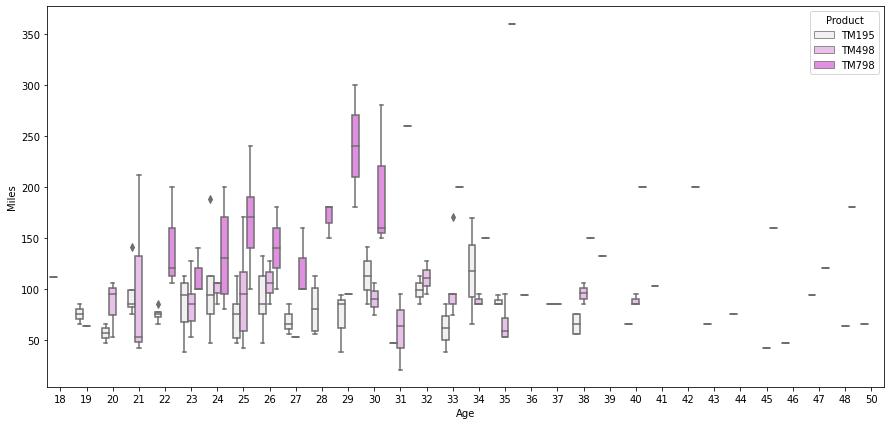

In [51]:
bplotshue(df, 'Age', 'Miles', 'Product')

<Figure size 1080x504 with 0 Axes>

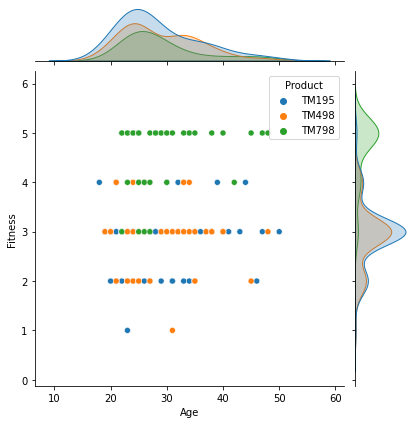

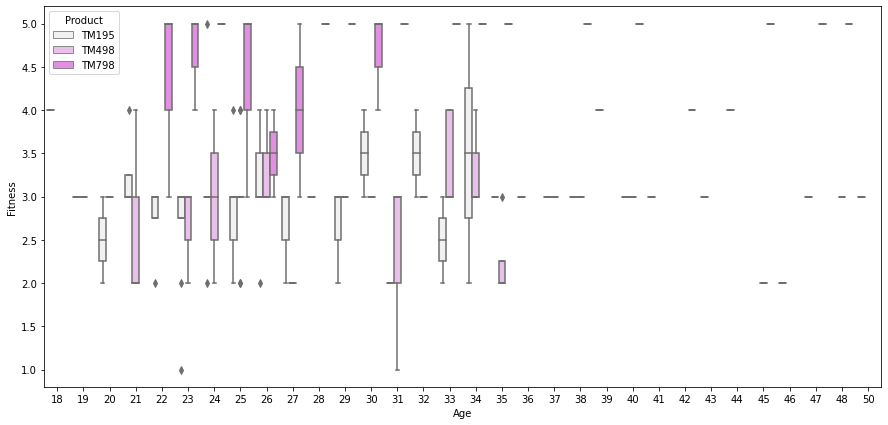

In [52]:
bplotshue(df, 'Age', 'Fitness', 'Product')

<Figure size 1080x504 with 0 Axes>

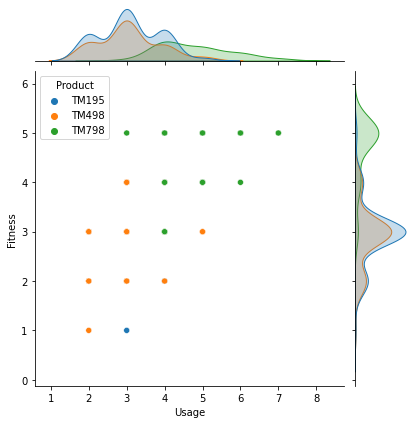

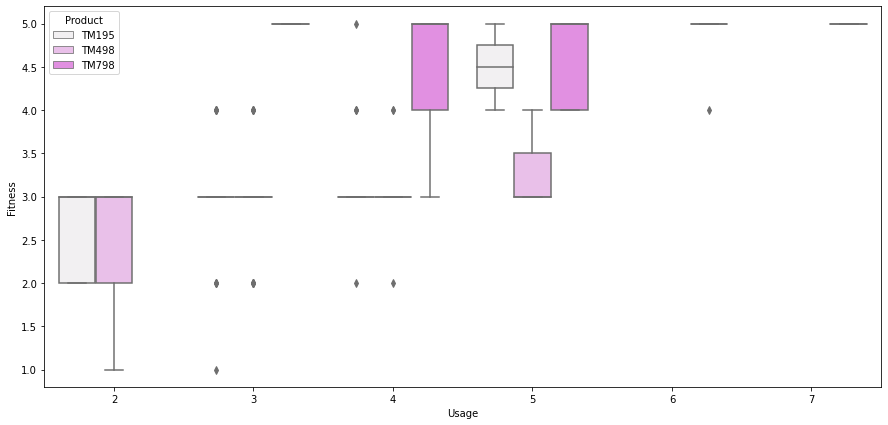

In [53]:
bplotshue(df, 'Usage', 'Fitness', 'Product')

<Figure size 1080x504 with 0 Axes>

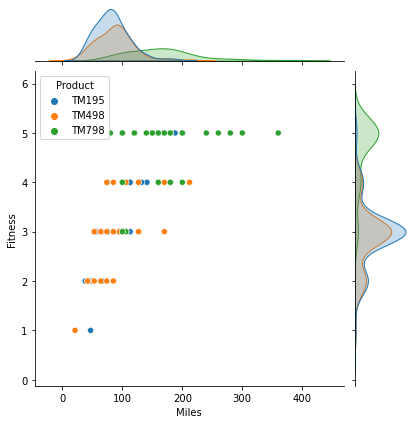

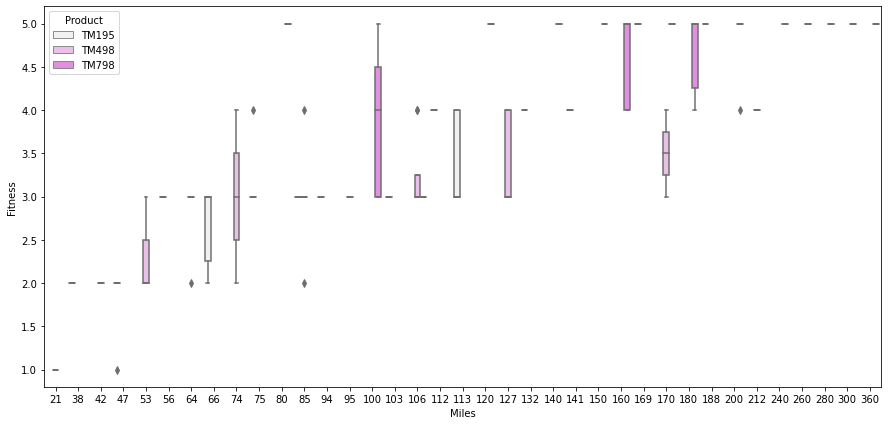

In [54]:
bplotshue(df, 'Miles', 'Fitness', 'Product')

<Figure size 1080x504 with 0 Axes>

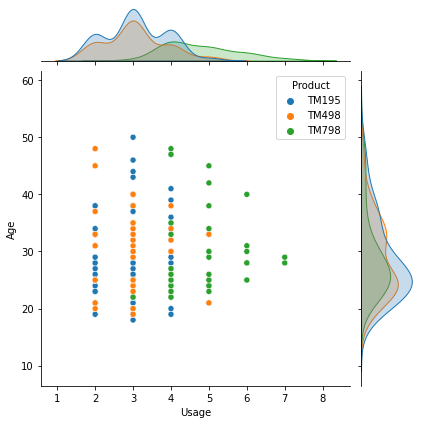

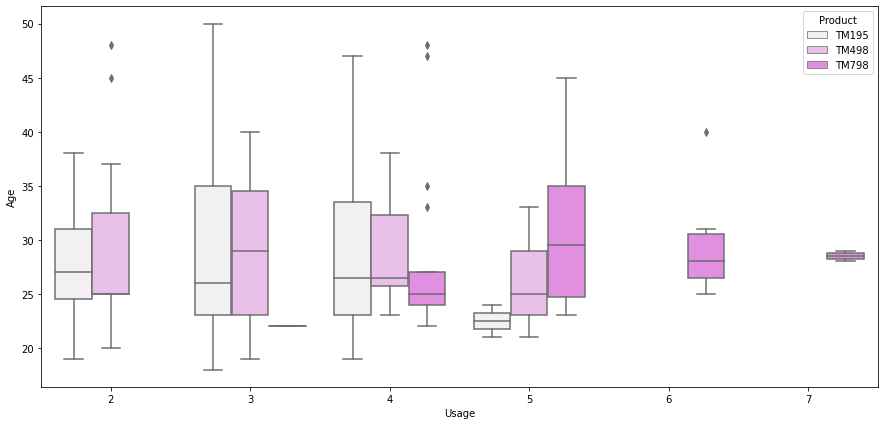

In [55]:
bplotshue(df, 'Usage', 'Age', 'Product')